# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning:

invalid escape sequence '\$'

<>:55: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\jurin\AppData\Local\Temp\ipykernel_3740\1842324635.py:55: SyntaxWarning:

invalid escape sequence '\$'



,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


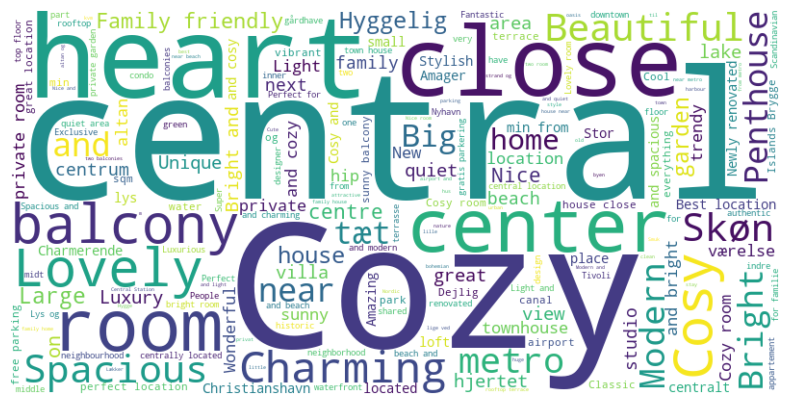

In [98]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

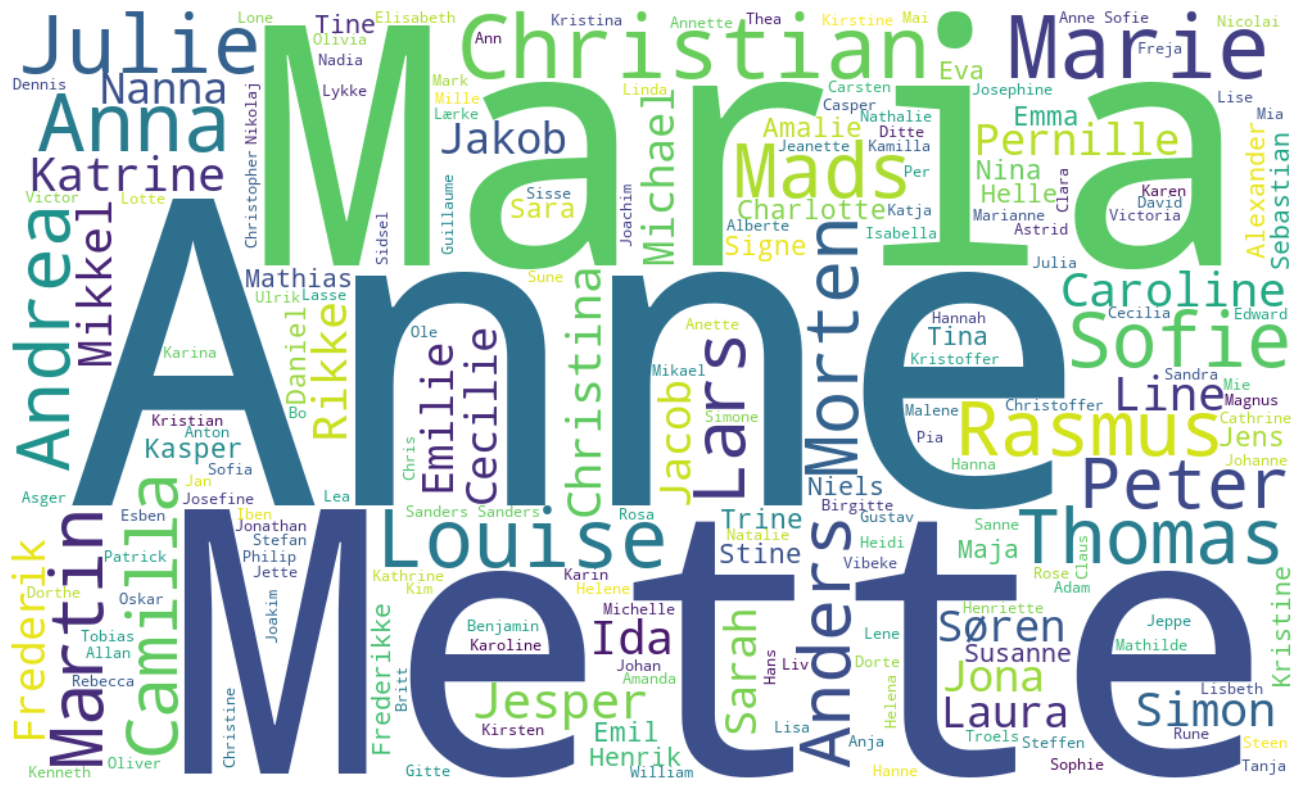

In [99]:
import re
# Define a regular expression pattern to filter out non-person names
host_name = data_filtered['host_name']
host_name = host_name.dropna()

# Filter out non-person names
# host_name = host_name[host_name.str.match(pattern, flags=re.IGNORECASE)].dropna()
# Join all the names into a single string
all_names_text = ' '.join(host_name)
stop_words = ["Place", "LLC", "Inc", "Corporation","Co.", "Company", "Apartments","Rentals", "og", "&", "Denmark", "Copenhagen", "København", "Rent","A", 
              "ApartmentInCopenhagen","ApartmentinCopenhagen","Forenom", "A","Place", "Blueground", "And", "Into" ,"This"]

# Create and generate a word cloud image
wordcloud = WordCloud(width=1000, height=600, stopwords=stop_words, background_color='white').generate(all_names_text)

# Display the generated word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Result: 
We decided to use the data_filtered variable that represents all the listings that contain a review.
According to Danmarks Statisitcs the most popular names are Anne and Peter. The name Anne seems to be the most represented alongside with Mette, which is the second most popular female name in the Danmarks Statisitcs rating. However the same can't be said about Peter. The most popular male name in the retrieved dataset is Christian.

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [100]:
# State your solution here. Add more cells if needed.
import plotly.express as px

lon = data_filtered['longitude'].dropna()
lat = data_filtered['latitude'].dropna()

fig = px.scatter_mapbox(data_filtered,
                        lat="latitude",
                        lon="longitude",
                        zoom=11,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

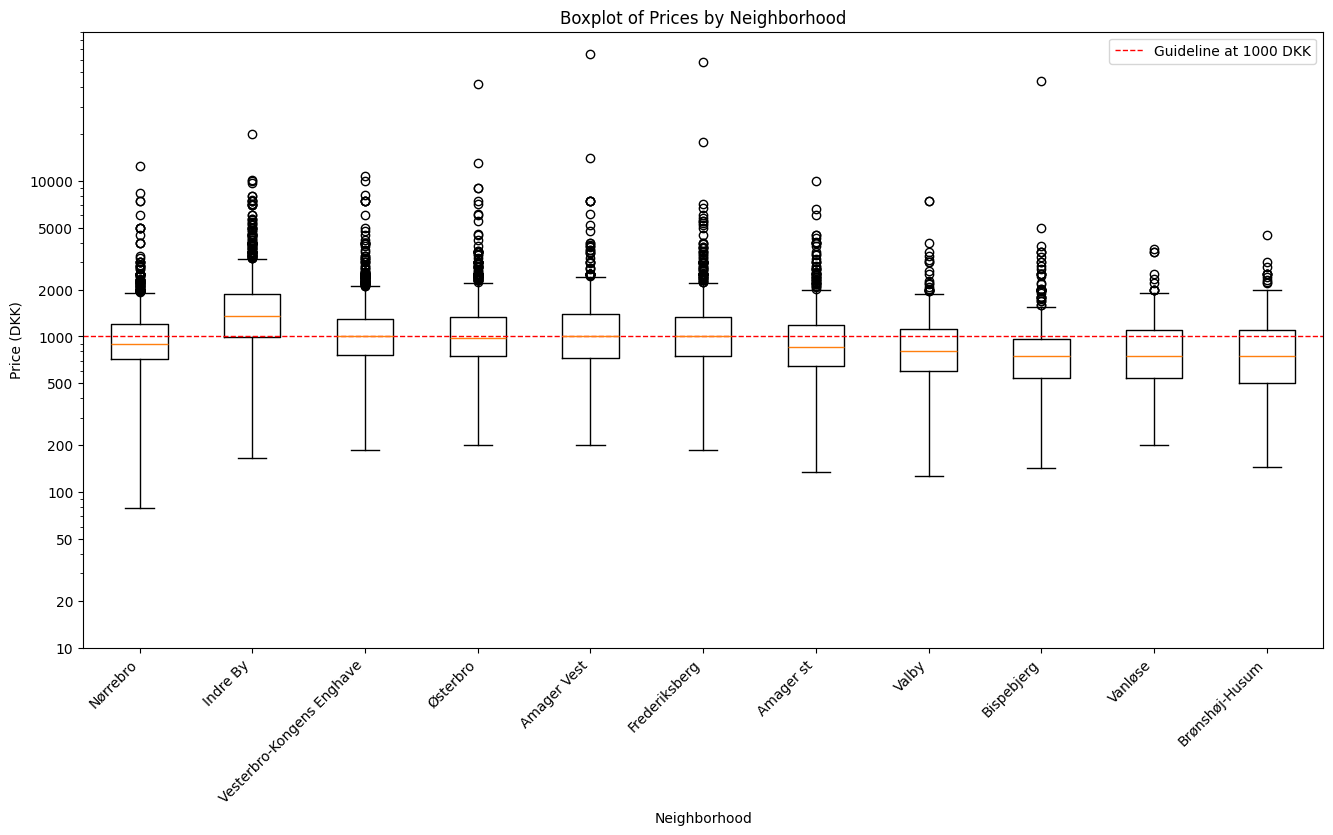

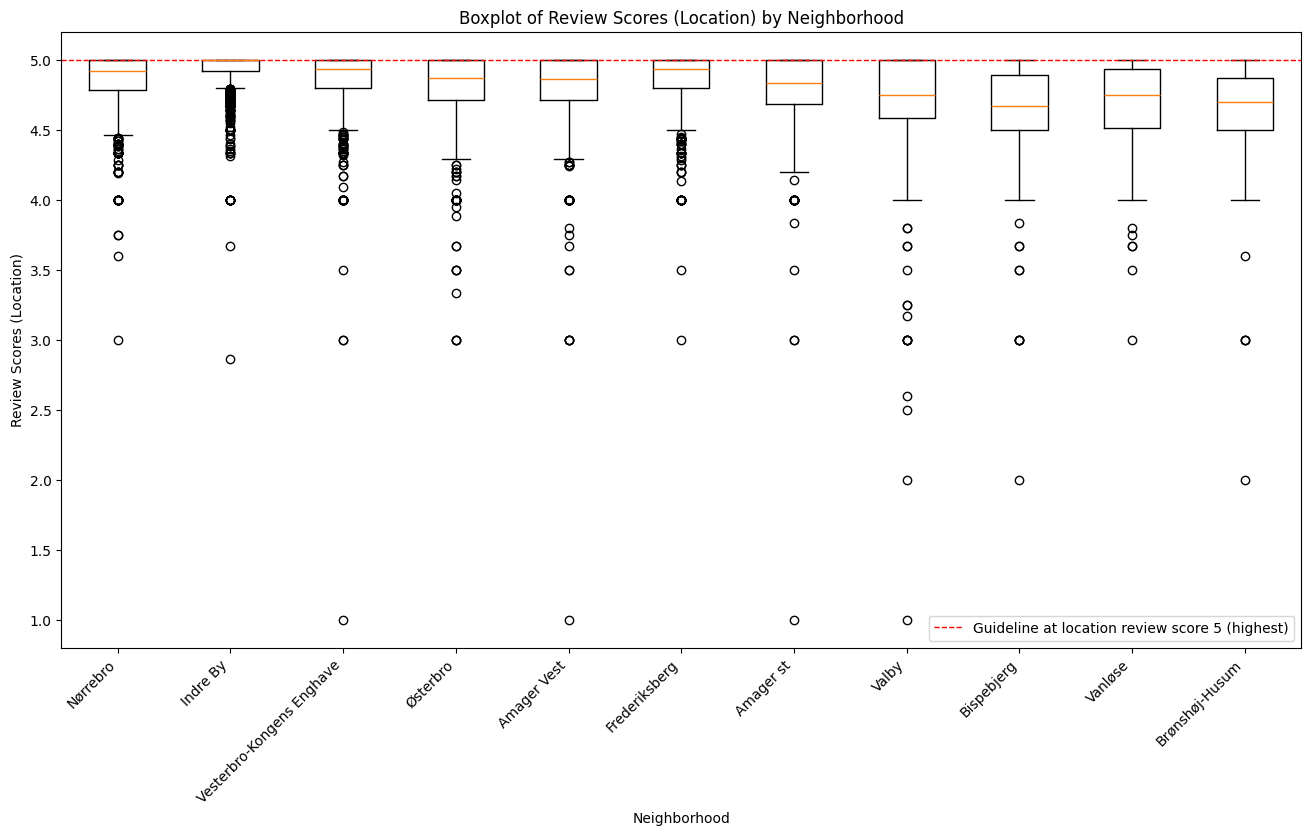

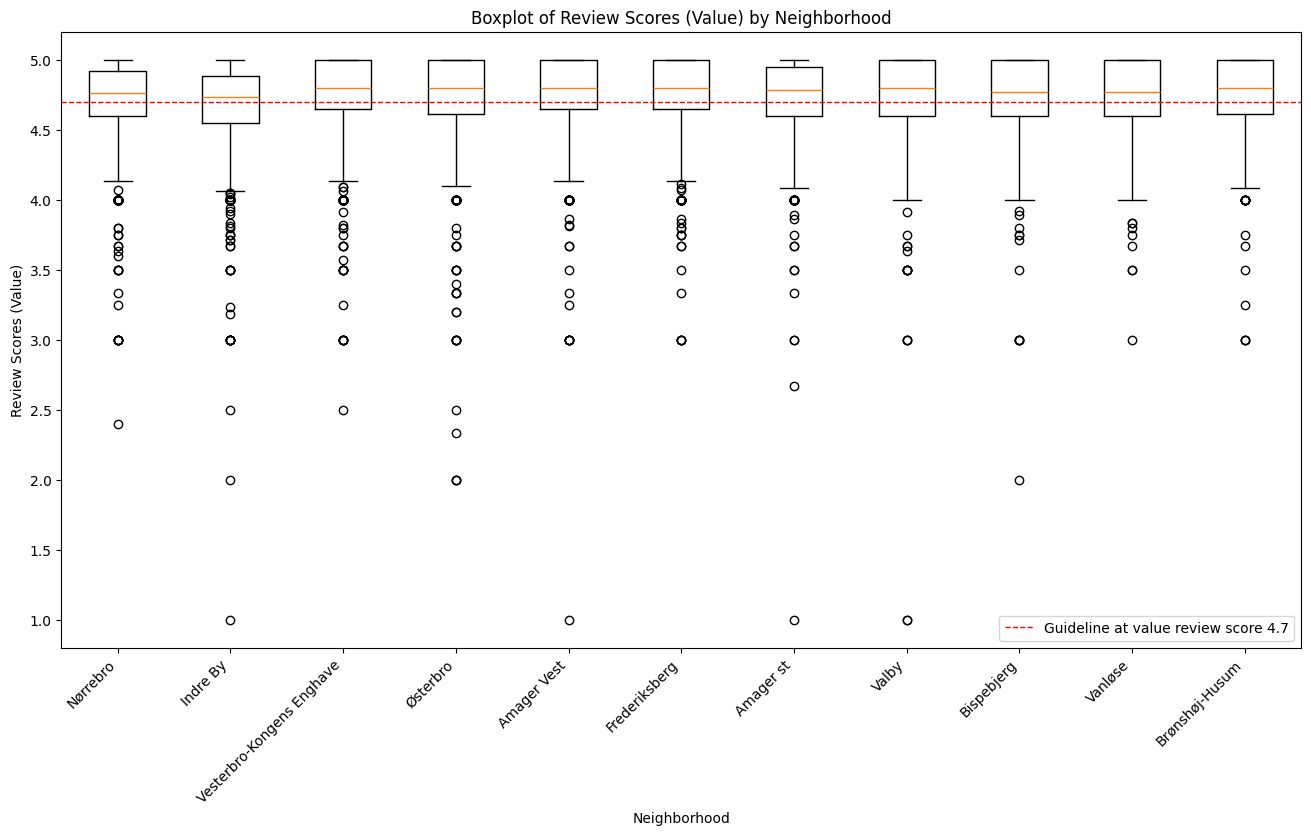

In [101]:
# State your solution here. Add more cells if needed.
import matplotlib.pyplot as plt

# Boxplot of prices by neighborhood

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]['price'] for neighborhood in data_filtered['neighbourhood_cleansed'].unique()],
            labels=data_filtered['neighbourhood_cleansed'].unique())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yscale('log', base=10)

# Add more guide values on the y-axis
guide_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
plt.yticks(guide_values, [str(value) for value in guide_values])

# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Price (DKK)')
plt.title('Boxplot of Prices by Neighborhood')

# Add a guideline at a specific y-axis value 
plt.axhline(y=1000, color='red', linestyle='--', linewidth=1, label='Guideline at 1000 DKK')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Boxplot of review scores location by neighborhood

# Create a boxplot
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]['review_scores_location'] for neighborhood in data_filtered['neighbourhood_cleansed'].unique()],
            labels=data_filtered['neighbourhood_cleansed'].unique())


# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Review Scores (Location)')
plt.title('Boxplot of Review Scores (Location) by Neighborhood')

# Add a guideline at a specific y-axis value 
plt.axhline(y=5, color='red', linestyle='--', linewidth=1, label='Guideline at location review score 5 (highest)')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Create a boxplot for review_scores_value
plt.figure(figsize=(16, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighborhood]['review_scores_value'] for neighborhood in data_filtered['neighbourhood_cleansed'].unique()],
            labels=data_filtered['neighbourhood_cleansed'].unique())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Review Scores (Value)')
plt.title('Boxplot of Review Scores (Value) by Neighborhood')

# Add a guideline at a specific y-axis value 
plt.axhline(y=4.7, color='red', linestyle='--', linewidth=1, label='Guideline at value review score 4.7')

# Show the legend
plt.legend()

# Show the plot
plt.show()





Result:
There seem to be no no low-end outliers, only high-end outliers, so we can deduce that airbnbs in Copenahgen are quite expensive.
According to the medians it is safe to assume that the most expensive neighbourhood is Indre By and the least expensive is either Bispebjerg or Bronshoj-Husum.

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [102]:
 # Group data by neighbourhood and room type
from statistics import mode, median
import pandas as pd

neighbourhood_room_analysis = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])
 
price_stats = neighbourhood_room_analysis['price'].describe()

# Add mode to the price stats 
price_stats['mode'] = neighbourhood_room_analysis['price'].agg(lambda x: mode(x))
display(price_stats)






count         mean          std  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   909.0  1234.226623   832.696891   
                          Private room      148.0  1032.966216  5299.018095   
                          Shared room         2.0  1051.500000   112.429978   
Amager st                 Entire home/apt   791.0  1093.584071   721.982284   
                          Hotel room          3.0  1296.000000   211.184753   
                          Private room      129.0   549.325581   293.995992   
                          Shared room         1.0  2575.000000          NaN   
Bispebjerg                Entire home/apt   508.0   992.592520  1981.580545   
                          Private room       95.0   488.978947   353.674089   
                          Shared room         1.0   198.000000          NaN   
Brønshøj-Husum            Entire home/apt   216.0  1014.995370   555.669548   
                          Private room       67.0   445.552239   201.631624   
                          Shared room         2.0   211.500000    16.263456   
Frederiksberg             Entire home/apt  1044.0  1292.472222  1958.802772   
                          Private room      133.0   621.706767   567.611220   
Indre By                  Entire home/apt  1702.0  1642.387192  1072.616232   
                          Hotel room         10.0  1077.200000   654.255098   
                          Private room      128.0   698.984375   380.070466   
                          Shared room         4.0   292.000000    67.577116   
Nørrebro                  Entire home/apt  1889.0  1047.742192   583.703218   
                          Private room      165.0   650.121212   760.270040   
                          Shared room         3.0   324.666667   130.481161   
Valby                     Entire home/apt   450.0  1017.968889   635.434691   
                          Private room       89.0   498.157303   288.616366   
Vanløse                   Entire home/apt   254.0   954.425197   496.658320   
                          Private room       44.0   413.409091   194.578652   
Vesterbro-Kongens Enghave Entire home/apt  1811.0  1181.435119   698.122481   
                          Private room      221.0   574.366516   295.726896   
                          Shared room         2.0   330.500000   113.844192   
Østerbro                  Entire home/apt  1174.0  1248.551107  1438.908216   
                          Private room      130.0   605.461538   437.259030   
                          Shared room         1.0   469.000000          NaN   

                                              min      25%     50%      75%  \
neighbourhood_cleansed    room_type                                           
Amager Vest               Entire home/apt   250.0   814.00  1050.0  1480.00   
                          Private room      200.0   400.00   500.0   655.00   
                          Shared room       972.0  1011.75  1051.5  1091.25   
Amager st                 Entire home/apt   240.0   700.00   900.0  1200.00   
                          Hotel room       1149.0  1175.00  1201.0  1369.50   
                          Private room      135.0   400.00   471.0   600.00   
                          Shared room      2575.0  2575.00  2575.0  2575.00   
Bispebjerg                Entire home/apt   235.0   600.00   800.0  1000.00   
                          Private room      143.0   300.00   400.0   528.50   
                          Shared room       198.0   198.00   198.0   198.00   
Brønshøj-Husum            Entire home/apt   250.0   655.75   900.0  1250.00   
                          Private room      145.0   320.00   400.0   500.00   
                          Shared room       200.0   205.75   211.5   217.25   
Frederiksberg             Entire home/apt   300.0   822.50  1037.0  1400.00   
                          Private room      185.0   400.00   500.0   700.00   
Indre By      

### 5. Based on self-chosen features, develop a logistic regression mode and k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [104]:
#Here put your beautiful code

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import random
import numpy as np

'''data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]
'''
 

# Binarize the review_scores_rating column
binarized_ratings = data_filtered['review_scores_rating'].apply(lambda x: 1 if x >= 4.5 else 0)

# data_filtered['review_scores_rating'] = data_filtered['review_scores_rating'].apply(lambda x: 1 if x >= 4.5 else 0)

X, y = data_filtered[['price', 'number_of_reviews', 'minimum_nights', 'availability_365']], binarized_ratings
# X, y = data_filtered[['price', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'availability_365']], binarized_ratings
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

##K-NN classifier

print('K-NN classifier:\n')

clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
        .format(clf.score(X_train, y_train)))

print('Test set predictions:\n{}'.format(clf.predict(X_test)))

## Define a custom dataset with 50 randomized values
# Set random seed for reproducibility
np.random.seed(0)
random.seed(0)

# Generate 50 random values for each feature
# price = np.random.randint(50, 1000, 50)
price = np.random.randint(data_filtered['price'].min(), data_filtered['price'].max(), 50)
number_of_reviews = np.random.randint(0, 100, 50)
# review_scores_cleanliness = np.random.randint(0, 10, 50)
# review_scores_checkin = np.random.randint(0, 10, 50)
availability_365 = np.random.randint(0, 365, 50)
minimum_nights = np.random.randint(1, 30, 50)


# Combine the features into a single array
x_new = np.column_stack((price, number_of_reviews, minimum_nights, availability_365))


#Create dataframe
x_new = pd.DataFrame(x_new, columns=['price', 'number_of_reviews', 'minimum_nights', 'availability_365'])
# x_new = pd.DataFrame(x_new, columns=['price', 'number_of_reviews', 'review_scores_cleanliness', 'review_scores_checkin', 'availability_365'])

## Predict custom dataset
print('Custom dataset predictions:\n{}'.format(clf.predict(x_new)))

print('-----------------------------------------------')

## Logistic Regression
print('Logistic Regression:\n')

log_res = LogisticRegression(C=30, random_state=504)
log_res.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
        .format(log_res.score(X_train, y_train)))

print('Test set predictions:\n{}'.format(log_res.predict(X_test)))

## Predict custom dataset
print('Custom dataset predictions:\n{}'.format(log_res.predict(x_new)))




K-NN classifier:

Accuracy of K-NN classifier on training set: 0.92
Test set predictions:
[1 1 1 ... 1 1 1]
Custom dataset predictions:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1]
-----------------------------------------------
Logistic Regression:

Accuracy of Logistic regression classifier on training set: 0.92
Test set predictions:
[1 1 1 ... 1 1 1]
Custom dataset predictions:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
